# Python Brno - Part 1B - Pandas

### Pandas

- Provides high-performance, easy-to-use data structures and data analysis tools for the Python programming language.


- `pandas.DataFrame`
  - 2D size-mutable data structure with labeled row index and labeled column index.
- `pandas.Series`
  - 1D size-mutable data structure with labeled row index and labeled column.


- Fantastic documentation: http://pandas.pydata.org/pandas-docs/stable/

### The Titanic Survival Problem

Predict whether a passenger on the titanic will survive. 
- Input: information about each passenger
- Output: whether or not the passenger survived

The data we will use is located in the file `titanic_data.csv` and is similar to the set from https://www.kaggle.com/c/titanic/data





### Exploring the Titanic Data

Load the pandas library with alias `pd`

In [50]:
import pandas as pd
pd.options.display.max_rows = 8

Load matplotlib

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt

Read the data csv file into a pandas DataFrame

In [52]:
df = pd.read_csv('titanic_data.csv')

See what's inside the DataFrame

In [53]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


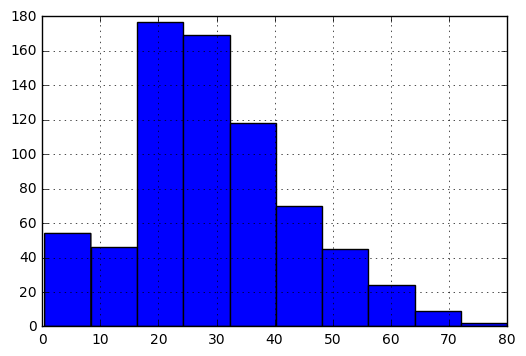

In [54]:
df.Age.hist()

Typing `df.` and pressing `Tab` we can see the methods available on this DataFrame

In [55]:
# df.

### Exercises

1. Write each of these expressions in a separate cell and interpret what they do
```python3
df.columns
df.head()
df.tail()
df.shape
df.info()
df.dtypes
```
2. What is the type of each of the expressions above?
3. There's a function which provides summary statistics for a pandas DataFrame. Do a google search for 'pandas summary statistics', find out what the function name is and execute this function in a new cell.
4. Interpret each line of the output from this summary statistics function.

### Selection
#### Column Selection

In [56]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
                             ...                        
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, dtype: object

In [57]:
df.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
                             ...                        
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, dtype: object

What is the type of this column?

#### Row Selection - Integer Index

In [58]:
df.iloc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
                        ...           
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

#### Row Selection - Label Index 1

In [59]:
df.loc[0, :]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
                        ...           
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

What is the type of this row?

#### Row Selection - Label Index 2

In [60]:
import numpy as np

# Date range creation function
i = pd.date_range(pd.Timestamp('2016-01-01'), pd.Timestamp('today'))

# Create a dataframe with a series of random numbers
date_df = pd.DataFrame(np.random.randn(len(i)), columns=['random'], index=i)

date_df.head()

,random
2016-01-01,1.193320
2016-01-02,-0.088204
2016-01-03,-0.186896
2016-01-04,1.626452
2016-01-05,1.200133


In [61]:
date_df.loc['2016-01-04', :]

random    1.626452
Name: 2016-01-04 00:00:00, dtype: float64

We can do magical things with label based indexes (month based selection)

#### Row + Column Selection

In [62]:
df.loc[5:8,'Fare']

5     8.4583
6    51.8625
7    21.0750
8    11.1333
Name: Fare, dtype: float64

In [63]:
# df.loc[0:5, 'PassengerId', 'Name']

In [64]:
df.loc[0:5, ['PassengerId', 'Name']]

,PassengerId,Name
0,1,"Braund, Mr. Owen Harris"
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,"Heikkinen, Miss. Laina"
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,"Allen, Mr. William Henry"
5,6,"Moran, Mr. James"


What is the type of this selection?

### Exercise
1. Select the ticket column of passengers 100 to 200 inclusive

### Filtering

Determine which rows have value `male` in the `Sex` column.

In [65]:
df.Sex == 'male'

0       True
1      False
2      False
3      False
       ...  
887    False
888    False
889     True
890     True
Name: Sex, dtype: bool

What is the type of this column?

In [66]:
type(df.Sex == 'male')

pandas.core.series.Series

To select all the rows with Sex value male use the square bracket operator.

In [67]:
df[df.Sex == 'male']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


Compose complex filters using the `&` operator.

### Exercises

1. Use the `>=` operator to select all passengers older than 40
1. Select all female passengers who survived and are between 20 and 30

### More functions

In [68]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [69]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False
890,False,False,False,False,False,False,False,False,False,False,True,False


In [70]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [71]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
              ... 
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

### Exercises

How many people were in second class?

How many different classes were there?

In [77]:
# %load solutions/1-6.py

### Group By: split-apply-combine
- Reference: http://pandas.pydata.org/pandas-docs/stable/groupby.html

By "group by" we are referring to a process involving one or more of the following steps

- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

In [73]:
pd.options.display.max_rows = 20

In [74]:
df.groupby('Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


What was the average age of females and males who survived?

In [83]:
# %load solutions/1-7.py